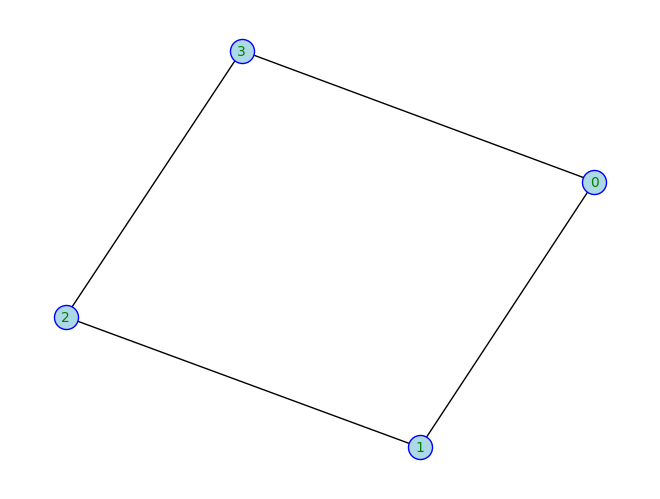

In [5]:
import networkx as nx
C4 = nx.cycle_graph(4)
nx.draw(C4,with_labels=True,node_size=300,node_color='lightblue',font_size='10',font_color='green',edgecolors='blue')

In [6]:
import igraph as ig

# convert to igraph
h = ig.Graph.from_networkx(C4)

In [7]:
type(h)

igraph.Graph

In [8]:
type(C4)

networkx.classes.graph.Graph

In [11]:
import pprint
from collections import defaultdict


class GUGULI(object):
    """ Graph data structure, undirected by default. """

    def __init__(self, connections, directed=False):
        self._graph = defaultdict(set)
        self._directed = directed
        self.add_connections(connections)

    def add_connections(self, connections):
        """ Add connections (list of tuple pairs) to graph """

        for node1, node2 in connections:
            self.add(node1, node2)

    def add(self, node1, node2):
        """ Add connection between node1 and node2 """

        self._graph[node1].add(node2)
        if not self._directed:
            self._graph[node2].add(node1)

    def remove(self, node):
        """ Remove all references to node """

        for n, cxns in self._graph.items():  # python3: items(); python2: iteritems()
            try:
                cxns.remove(node)
            except KeyError:
                pass
        try:
            del self._graph[node]
        except KeyError:
            pass

    def is_connected(self, node1, node2):
        """ Is node1 directly connected to node2 """

        return node1 in self._graph and node2 in self._graph[node1]

    def find_path(self, node1, node2, path=[]):
        """ Find any path between node1 and node2 (may not be shortest) """

        path = path + [node1]
        if node1 == node2:
            return path
        if node1 not in self._graph:
            return None
        for node in self._graph[node1]:
            if node not in path:
                new_path = self.find_path(node, node2, path)
                if new_path:
                    return new_path
        return None

    def __str__(self):
        return '{}({})'.format(self.__class__.__name__, dict(self._graph))


connections = [('A', 'B'), ('B', 'C'), ('B', 'D'),
                   ('C', 'D'), ('E', 'F'), ('F', 'C')]
g = GUGULI(connections, directed=True)

type(g)

__main__.GUGULI